<a href="https://colab.research.google.com/github/Pradeep333Singh/Pw_Assignments_DataScience/blob/main/EDA_Bike_Details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EDA on Bike details data.

In [15]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the data
df = pd.read_csv('BIKE DETAILS.csv')

In [4]:
#clean and prep the data for EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
df.shape

(1061, 7)

In [5]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [6]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [7]:
#Check for missing values and duplicates
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [8]:
df.duplicated().sum()

np.int64(6)

In [9]:
#Ques.1.What is the range of selling proces in the dataset?
min_price = df.selling_price.min()
max_price = df['selling_price'].max()
print(f"Range of selling prices: INR {min_price} to INR {max_price}")


Range of selling prices: INR 5000 to INR 760000


In [10]:
#Ques.2. What  is the median selling price?
median_price = df['selling_price'].median()
print(f"Median selling price: INR {median_price}")

Median selling price: INR 45000.0


In [11]:
#Ques.3. What is the most common seller type?
seller_counts = df['seller_type'].value_counts()
print("Seller types and their counts:\n", seller_counts)
most_common_seller = seller_counts.idxmax()
print(f"Most common seller type: {most_common_seller} ({seller_counts[most_common_seller]} listings)")



Seller types and their counts:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64
Most common seller type: Individual (1055 listings)


In [12]:
#Ques.4. How many bikes have drives more than 50000Km?
high_km_count = (df['km_driven'] > 50000).sum()
total_bikes = df.shape[0]
print(f"Bikes with >50,000 km: {high_km_count} out of {total_bikes} ({high_km_count/total_bikes:.1%})")


Bikes with >50,000 km: 170 out of 1061 (16.0%)


In [13]:
#Ques.5.What is the average km_driven for each ownership type?
km_by_owner = df.groupby('owner')['km_driven'].mean().sort_index()
print("Average km_driven by owner type:\n", km_by_owner)


Average km_driven by owner type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [14]:
#Ques.6.What proportion of bikes are from 2015 or older?
older_bikes = (df['year'] <= 2015).sum()
prop_older = older_bikes / total_bikes
print(f"Proportion of bikes from 2015 or older: {older_bikes}/{total_bikes} = {prop_older:.1%}")


Proportion of bikes from 2015 or older: 601/1061 = 56.6%


Missing ex_showroom_price: 435 / 1061  (41.00%)



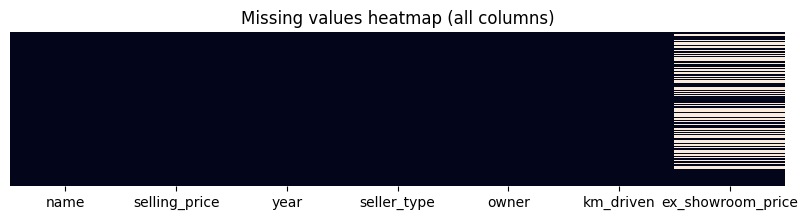

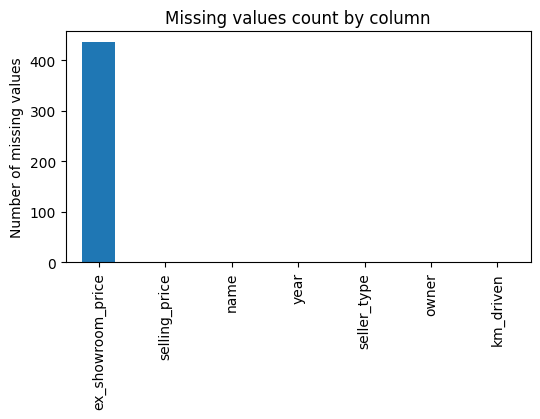


% rows with ex_showroom_price missing by seller_type (rows grouped by seller_type):
 ex_missing   False  True 
seller_type              
Dealer       50.00  50.00
Individual   59.05  40.95

% rows with ex_showroom_price missing by owner (rows grouped by owner):
 ex_missing  False  True 
owner                   
1st owner   60.17  39.83
2nd owner   53.66  46.34
3rd owner   27.27  72.73
4th owner   33.33  66.67

% rows with ex_showroom_price missing by year (rows grouped by year):
 ex_missing  False   True 
year                     
1988         0.00  100.00
1991         0.00  100.00
1993         0.00  100.00
1995         0.00  100.00
1997         0.00  100.00
1998         0.00  100.00
1999         0.00  100.00
2000         0.00  100.00
2001        50.00   50.00
2002         0.00  100.00
2003         0.00  100.00
2004        20.00   80.00
2005         7.14   92.86
2006        20.00   80.00
2007        20.69   79.31
2008        25.00   75.00
2009        50.00   50.00
2010        46.67   

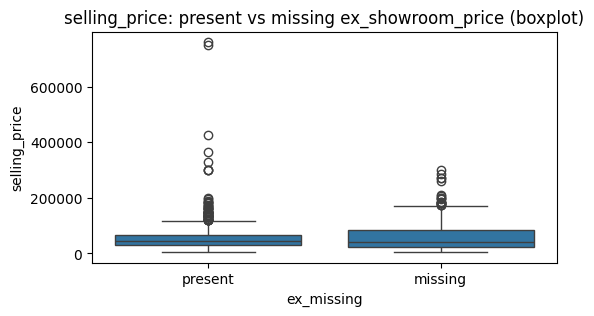

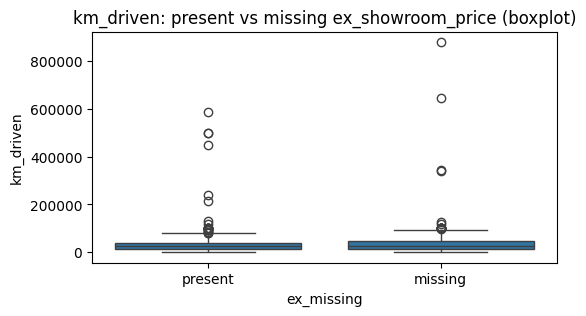

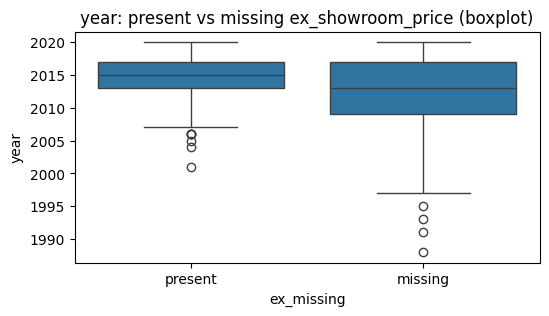

In [18]:
#Ques.7. What is the trend of missing values in the dataset?
# 1) Basic missing counts and percent
col = 'ex_showroom_price'
n_total = len(df)
n_missing = df[col].isna().sum()
print(f"Missing {col}: {n_missing} / {n_total}  ({n_missing / n_total:.2%})\n")

# 2) Quick visual: overall missing-values heatmap and missing-count bar
plt.figure(figsize=(10,2))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing values heatmap (all columns)')
plt.show()

plt.figure(figsize=(6,3))
df.isnull().sum().sort_values(ascending=False).plot.bar()
plt.title('Missing values count by column')
plt.ylabel('Number of missing values')
plt.show()


# 3) Add a boolean indicator for missingness to ease comparisons
df['ex_missing'] = df[col].isnull()

# 4) Compare missingness (%) across a few categorical columns
cats = ['seller_type', 'owner', 'year']   # year may be numeric but useful to inspect
for c in cats:
    if c in df.columns:
        tab = pd.crosstab(df[c], df['ex_missing'], normalize='index') * 100
        print(f"\n% rows with {col} missing by {c} (rows grouped by {c}):\n", tab.round(2))

# 5) Simple plots comparing numeric columns for rows with vs without ex_showroom_price
nums = ['selling_price', 'km_driven', 'year']
for n in nums:
    if n in df.columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x='ex_missing', y=n, data=df)
        plt.title(f'{n}: present vs missing {col} (boxplot)')
        plt.xticks([0,1], ['present','missing'])
        plt.show()

there are 435 missing values in ex_showroom_price which is nearly 41% of the data but it is also clear from the data that there are certain group of bikes whose information is missing. I have presented some comparison here with other column but dont know what to answer as the trend of missing values.


In [27]:
#Ques.8.What is the highest ex_showroom_price recorded, and for which bike?
max_ex_price = df['ex_showroom_price'].max()
bike_max_ex = df.loc[df['ex_showroom_price'].idxmax()]
print(f"Highest ex-showroom price: INR {max_ex_price}")
print("Bike with highest ex-showroom price:")
print(bike_max_ex[['name', 'selling_price', 'ex_showroom_price', 'year']])


Highest ex-showroom price: INR 1278000.0
Bike with highest ex-showroom price:
name                 Harley-Davidson Street Bob
selling_price                            750000
ex_showroom_price                     1278000.0
year                                       2013
Name: 134, dtype: object


In [28]:
#Ques.9.What is the total number of bikes listed by each seller type?
print("Number of bikes by seller type:")
print(seller_counts)

Number of bikes by seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


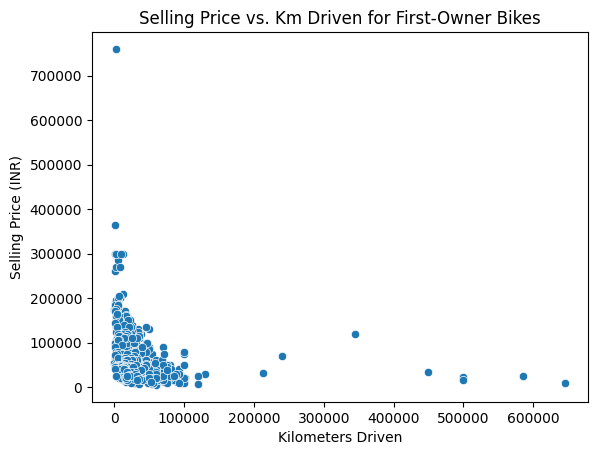

-0.2434817484496572


In [33]:
#Ques.10. What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'].str.contains("1st")]
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs. Km Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (INR)')
plt.show()
cor = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(cor)

#the scatterplot and corr = -0.24 indicates a negative and weak correlation between the km_driven and selling_price. That means as number of kilometres increases, selling price decreases but the relationship is not very strong.

In [34]:
#Ques.11. Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print(f"Identified {outliers.shape[0]} outlier(s) in km_driven using IQR method.")

# Remove outliers
df_no_outliers = df[~((df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound))]
print("Shape after removing outliers:", df_no_outliers.shape)


Identified 39 outlier(s) in km_driven using IQR method.
Shape after removing outliers: (1022, 8)


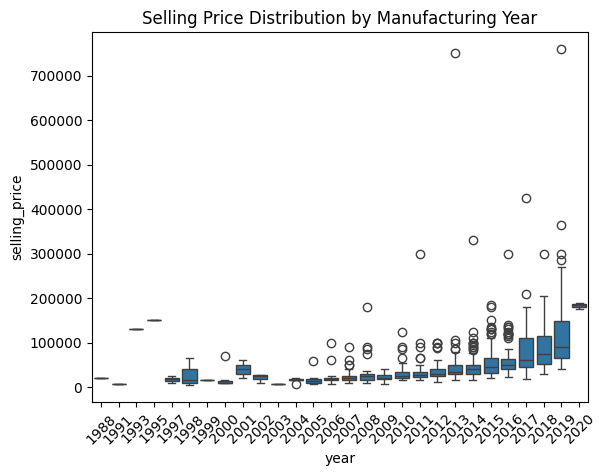

In [35]:
#Ques.12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title('Selling Price Distribution by Manufacturing Year')
plt.show()


In [36]:
#Ques.13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = pd.to_datetime('today').year
df['age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
df['annual_depreciation'] = df['depreciation'] / df['age'].replace(0, np.nan)
average_depr = df.groupby('age')['annual_depreciation'].mean().dropna()
print("Average annual depreciation (INR) by bike age:")
print(average_depr)


Average annual depreciation (INR) by bike age:
age
5    -6852.000000
6      492.427083
7     1860.456401
8     2788.260294
9     3147.576720
10    2801.327500
11    3136.873278
12    3590.573899
13    2870.588358
14    3364.476190
15    3043.928571
16    2389.236607
17    3219.554622
18    2355.500000
19    2087.605263
20    2242.600000
21    1754.857143
24    1452.166667
Name: annual_depreciation, dtype: float64


In [39]:
#Ques.14.Which bike names are priced significantly above the average price for their manufacturing year?
year_avg = df.groupby('year')['selling_price'].mean()
df['above_avg_price'] = df.apply(lambda row: row['selling_price'] > 1.2 * year_avg[row['year']], axis=1)
above_avg_bikes = df[df['above_avg_price']]
print("Bikes significantly above average price for their year:")
print(above_avg_bikes[['name', 'year', 'selling_price', 'ex_showroom_price']])


Bikes significantly above average price for their year:
                                      name  year  selling_price  \
0                Royal Enfield Classic 350  2019         175000   
2      Royal Enfield Classic Gunmetal Grey  2018         150000   
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                           Yamaha YZF R3  2019         365000   
17                        Yamaha YZF R15 S  2010          40000   
...                                    ...   ...            ...   
984              Royal Enfield Classic 500  2014          95000   
985              Royal Enfield Classic 500  2011          90000   
1005                    TVS Apache RTR 160  2014          60000   
1008                    Bajaj Pulsar 220 F  2012          52000   
1023                Bajaj Avenger 220 dtsi  2012          45000   

      ex_showroom_price  
0                   NaN  
2              148114.0  
7                   NaN  
13             351680.0  
17       

Correlation matrix:
                      selling_price      year  km_driven  ex_showroom_price  \
selling_price             1.000000  0.402188  -0.212937           0.918583   
year                      0.402188  1.000000  -0.288675           0.126378   
km_driven                -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price         0.918583  0.126378  -0.122011           1.000000   
age                      -0.402188 -1.000000   0.288675          -0.126378   
depreciation              0.345663 -0.343490   0.066531           0.688385   
annual_depreciation       0.383799 -0.148647   0.012413           0.698461   

                          age  depreciation  annual_depreciation  
selling_price       -0.402188      0.345663             0.383799  
year                -1.000000     -0.343490            -0.148647  
km_driven            0.288675      0.066531             0.012413  
ex_showroom_price   -0.126378      0.688385             0.698461  
age                

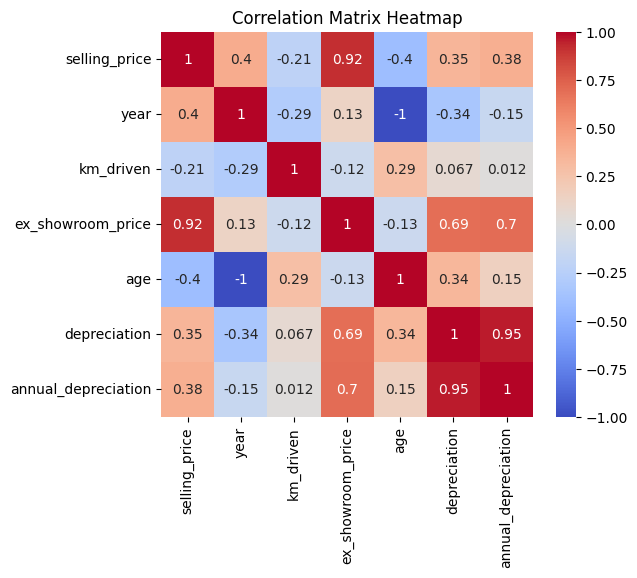

In [40]:
#Ques.15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
print("Correlation matrix:\n", corr_matrix)

# Heatmap of correlations
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
